In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert-new/fe_bert_stem2_2.csv


In [2]:
bert_df = pd.read_csv('/kaggle/input/bert-new/fe_bert_stem2_2.csv')

In [3]:
bert_df.head(4)

,Kelas,Text,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,diskusikan gambar sampul di atas dengan menjaw...,-1.742539,1.319357,0.949083,1.194607,1.064591,0.271474,-0.117423,0.641722,...,-1.822169,0.269279,-2.106674,-0.936053,-0.437729,-0.322795,-0.430957,0.355015,-0.734874,-0.622970
1,1,pernahkah kalian mendengar suara duk duk,-2.294133,1.291791,0.272923,0.563296,0.710662,0.595617,-0.345499,1.723081,...,-0.808715,0.093540,-1.401402,0.296052,-0.887320,-0.207943,0.294742,1.972161,-0.780235,-1.182248
2,1,biasanya apa yang berbunyi duk duk,-1.845356,1.981219,0.601140,0.594695,0.840374,0.257990,-0.059986,1.818484,...,-1.125922,-0.019212,-2.496985,-0.515070,-0.505180,-0.398307,0.139708,1.670183,-0.518351,-0.485375
3,1,apa yang kalian lihat pada gambar di atas,-1.560574,1.981224,0.640977,1.013589,0.741580,-0.036166,-0.304491,1.669445,...,-1.093098,-0.018936,-2.705219,-0.850471,-0.527046,-0.189604,-0.175931,1.098098,-0.367513,-0.576332


In [4]:
X = bert_df.drop('Kelas', axis=1)
X = X.drop('Text', axis=1)
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-1.742539,1.319357,0.949083,1.194607,1.064591,0.271474,-0.117423,0.641722,0.261379,0.755921,...,-1.822169,0.269279,-2.106674,-0.936053,-0.437729,-0.322795,-0.430957,0.355015,-0.734874,-0.622970
1,-2.294133,1.291791,0.272923,0.563296,0.710662,0.595617,-0.345499,1.723081,0.025462,1.247300,...,-0.808715,0.093540,-1.401402,0.296052,-0.887320,-0.207943,0.294742,1.972161,-0.780235,-1.182248
2,-1.845356,1.981219,0.601140,0.594695,0.840374,0.257990,-0.059986,1.818484,0.077486,1.112509,...,-1.125922,-0.019212,-2.496985,-0.515070,-0.505180,-0.398307,0.139708,1.670183,-0.518351,-0.485375
3,-1.560574,1.981224,0.640977,1.013589,0.741580,-0.036166,-0.304491,1.669445,0.378134,0.849441,...,-1.093098,-0.018936,-2.705219,-0.850471,-0.527046,-0.189604,-0.175931,1.098098,-0.367513,-0.576332
4,-1.607411,1.039463,0.711083,0.975391,0.836444,0.694687,-0.152890,1.425531,-0.034328,0.780249,...,-0.876359,0.200177,-1.242542,-0.939372,-0.493214,-0.003860,-0.540401,1.738452,-0.565656,-0.919870


In [5]:
y = bert_df[['Kelas']]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'))
X, y = resample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

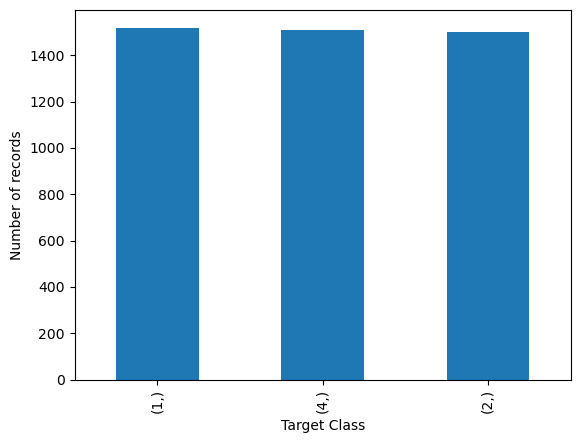

In [8]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
class_rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=20)
class_rf.fit(X_train, y_train)

/tmp/ipykernel_20/1327712900.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  class_rf.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto')

In [10]:
y_pred = class_rf.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, digits=3))

[[250  39  84]
 [ 29 253 102]
 [ 32  63 281]]
              precision    recall  f1-score   support

           1      0.804     0.670     0.731       373
           2      0.713     0.659     0.685       384
           4      0.602     0.747     0.667       376

    accuracy                          0.692      1133
   macro avg      0.706     0.692     0.694      1133
weighted avg      0.706     0.692     0.694      1133



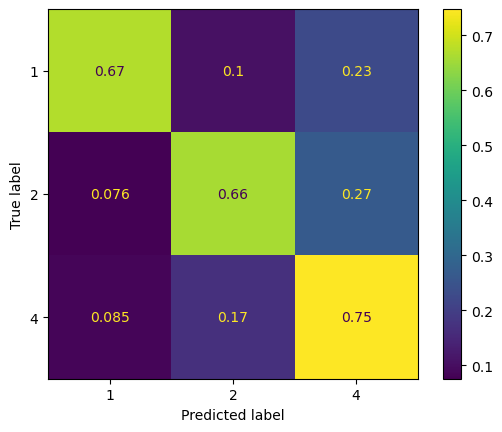

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(class_rf, X_test, y_test, normalize='true')
plt.show()

In [13]:
rf_model= RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [14]:

parameters = {'n_estimators': [10,100, 200, 500, 1000],
              'max_features': [6,32,'sqrt'],
              'max_depth': [10,20,40],
              'criterion' :['gini', 'entropy']
             }

In [15]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, scoring= 'accuracy', refit = 'True')
grid_search = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [16]:
print('best parameters: ')
print(grid_search.best_params_)
# best_params = grid_search.best_params_
rf_best_params = grid_search.best_params_

best parameters: 
{'criterion': 'gini', 'max_depth': 20, 'max_features': 6, 'n_estimators': 500}


In [17]:
rf_model.set_params(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)

/tmp/ipykernel_20/3224237077.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [18]:
grid_search=grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, grid_search, digits=3))

[[250  39  84]
 [ 29 253 102]
 [ 32  63 281]]
              precision    recall  f1-score   support

           1      0.816     0.678     0.741       373
           2      0.736     0.667     0.699       384
           4      0.606     0.766     0.677       376

    accuracy                          0.703      1133
   macro avg      0.719     0.704     0.706      1133
weighted avg      0.719     0.703     0.706      1133



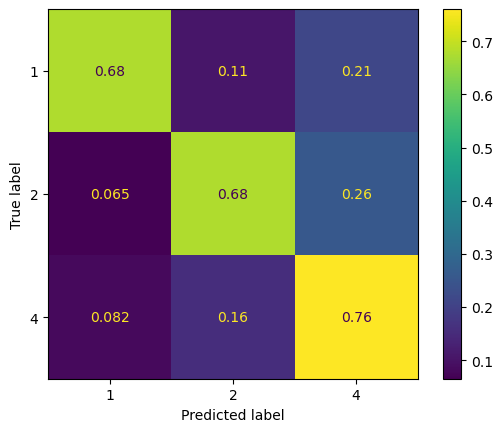

In [19]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, normalize='true')